In [89]:
import os
import pandas as pd
import regex as re
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))

In [105]:
data_df = pd.read_csv(os.path.join(ROOT_DIR, "results_1", "All_Results.csv"), parse_dates=["Date"], index_col=["Date"])
data_df = data_df.sort_index()
data_df = data_df.loc["2022-01-01":"2022-12-31"]
data_df = data_df.query("Topic == 55")
data_df["id"] = [index for index, row in enumerate(data_df.iterrows(), 1)]
data_df["Date"] = data_df.index
data_df = data_df.reset_index(drop=True)
data_df = data_df.set_index("id")

# data_df = data_df.drop(columns=["Title", "Text", "URL","Novelty","Resonance","Transience"])
# data_df = pd.get_dummies(data_df, columns=['Topic'])
data_df.query("Date == '2022-04-08'").head()

,Source,URL,Title,Text,Novelty,Transience,Resonance,Topic,Date
id,,,,,,,,,
355,DailyMail,https://www.dailymail.co.uk/news/article-10698...,Fresh Russian horrors discovered: Scene in vil...,The atrocities in Borodyanka are 'significantl...,6.116234,6.156701,-0.040467,55,2022-04-08
356,DailyMail,https://www.dailymail.co.uk/news/article-10698...,"More than 7,000 unclaimed Russian soldiers' bo...","Ukraine has boasted it has the corpses of 7,00...",5.261151,4.924329,0.336822,55,2022-04-08
357,Express,https://www.express.co.uk/news/world/1593127/p...,Putin on the run as Russian forces have now fu...,The move comes as the Russian President claims...,6.121052,5.635067,0.485985,55,2022-04-08
358,Express,https://www.express.co.uk/news/world/1593391/R...,Russia state TV using film set video to claim ...,"The video, gone live on Russia state-controlle...",6.278995,5.932293,0.346702,55,2022-04-08
359,Guardian,https://www.theguardian.com/world/2022/apr/08/...,Russia-Ukraine war: what we know on day 44 of ...,A missile strike on Kramatorsk railway station...,5.468652,5.251299,0.217353,55,2022-04-08


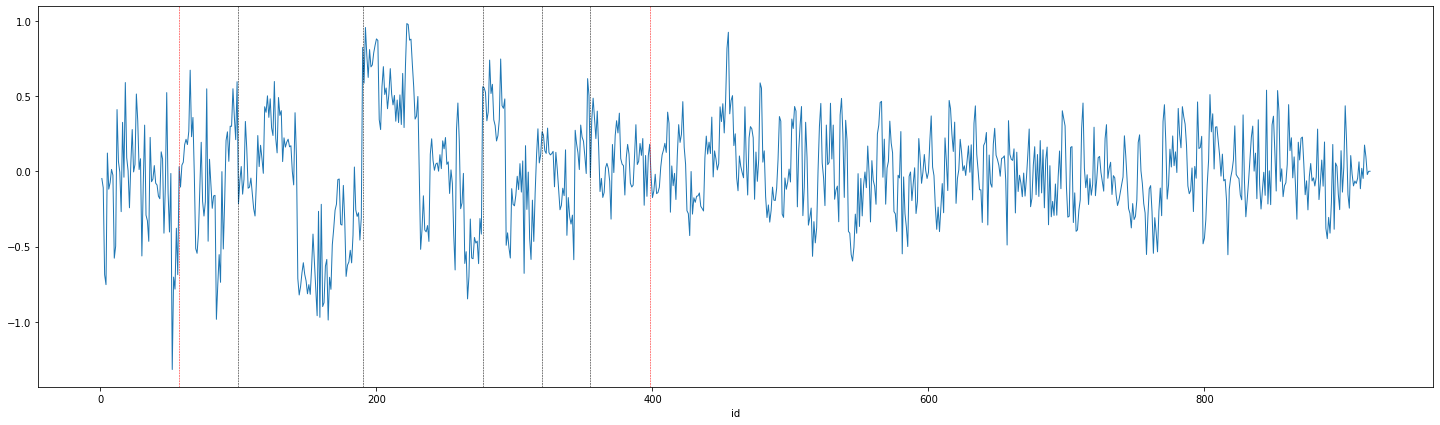

In [106]:
import matplotlib.pyplot as plt

def plot_resonance(data_df):
    plt.figure(figsize=(25,7))
    data_df["Resonance"].plot(linewidth=1)
    # data_df["Novelty"].plot(linewidth=1,c='b')
    # data_df["Transience"].plot(linewidth=1,c='g')
    # plt.xlabel('id')
    # plt.ylabel('Novelty (green), Transience (blue)')
    # plt.title('Novelty and Resonance vs id')
    plt.axvline(x=57, color='r', linestyle='--',lw=0.5)

    plt.axvline(x=100, color='k', linestyle='--',lw=0.5)
    plt.axvline(x=190, color='k', linestyle='--',lw=0.5)
    plt.axvline(x=277, color='k', linestyle='--',lw=0.5)
    plt.axvline(x=320, color='k', linestyle='--',lw=0.5)
    plt.axvline(x=355, color='k', linestyle='--',lw=0.5)

    plt.axvline(x=398, color='r', linestyle='--',lw=0.5)
    plt.show()


plot_resonance(data_df)


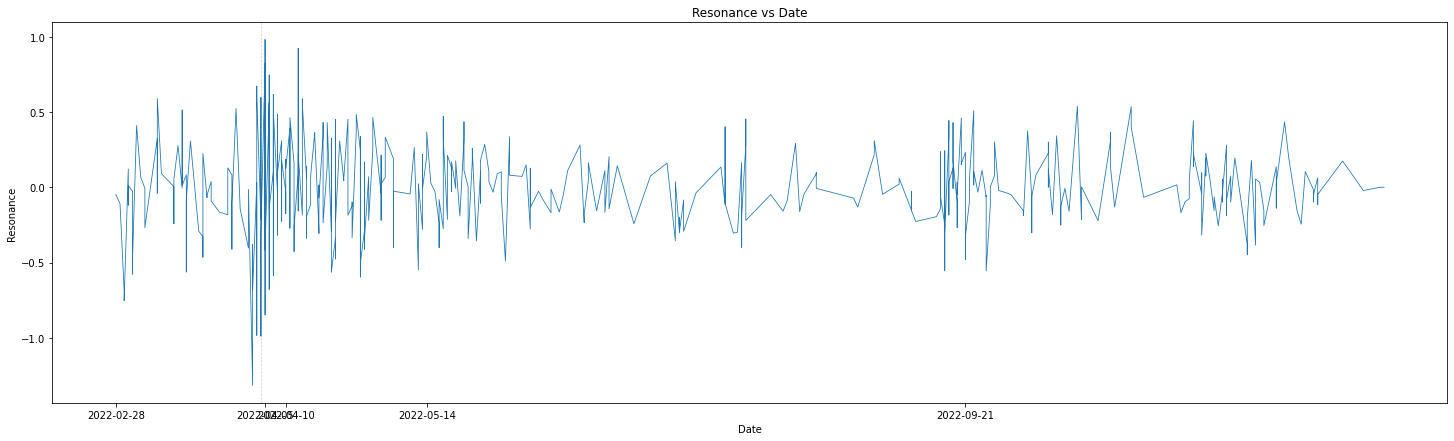

In [92]:
from matplotlib.dates import date2num
from datetime import datetime

def plot_resonance2(data_df, figsize=(25, 7), linewidth=0.8):
    plt.figure(figsize=figsize)
    plt.plot(data_df["Date"], data_df["Resonance"], linewidth=linewidth)
    plt.xlabel('Date')
    plt.ylabel('Resonance')
    plt.title('Resonance vs Date')
    plt.xticks(data_df["Date"][::200])

    plt.axvline(x=date2num(datetime(2022, 4, 4)), color='k', linestyle='--',lw=0.7, alpha=0.2)
    plt.show()

plot_resonance2(data_df=data_df)